# Notebook Project Probabilistic view in linguistic variation

In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import minkowski

In [2]:
import os
os.sys.path.append('../project_code')

In [3]:
from data.bhsa import book_sets, get_data #Load data
from markov.Markov_Chain import * #Transitions
from Distance.Distances import * #Distance metric
from Clustering.Clustering_analysis import * #Clustering algorithm
from Figures.Raw_Transformed import * #Figures

In [4]:
test = get_data(books=["sbh","lbh"])
features = {'clause_types', 'phrase_functions', 'phrase_types', 'word_pos'}
domain = {'N', 'Q', 'D'}

In [13]:
len(set(test["clause_types"]["N"]["Genesis"][0]))

22

In [86]:
transMatrix = transitionMatrix(test["word_pos"]["N"], True)

In [87]:
transDict = df_dict_Transformation(transMatrix)

In [88]:
df = pd.DataFrame(transDict).fillna(0)

In [89]:
df[df > 0] = 1

In [90]:
dfj = df.sum(1)

In [91]:
N = len(df.columns)

In [92]:
N

17

In [93]:
idf

Adju->Adju                    0.125163
Adju->Clause_Begin            2.833213
Adju->Clause_End              0.060625
Adju->Cmpl                    0.060625
Adju->Conj                    2.833213
Adju->Exst                    2.833213
Adju->Frnt                    2.833213
Adju->IntS                    2.833213
Adju->Intj                    2.833213
Adju->Loca                    0.435318
Adju->ModS                    2.833213
Adju->Modi                    0.435318
Adju->NCoS                    2.140066
Adju->NCop                    2.833213
Adju->Nega                    1.041454
Adju->Objc                    0.060625
Adju->PrAd                    1.223775
Adju->PreC                    0.125163
Adju->PreO                    1.223775
Adju->PreS                    2.833213
Adju->Pred                    0.125163
Adju->PtcO                    2.833213
Adju->Ques                    2.140066
Adju->Rela                    2.833213
Adju->Subj                    0.194156
Adju->Supp               

In [94]:
idf = np.log(N/(1+dfj))

In [95]:
df2 = pd.DataFrame(transDict).fillna(0) 

In [96]:
df2 = df2.apply(lambda x: np.asarray(x) * np.asarray(idf))

In [97]:
from scipy.spatial.distance import pdist

In [98]:
pds = pdist(df2.T, metric="cosine")

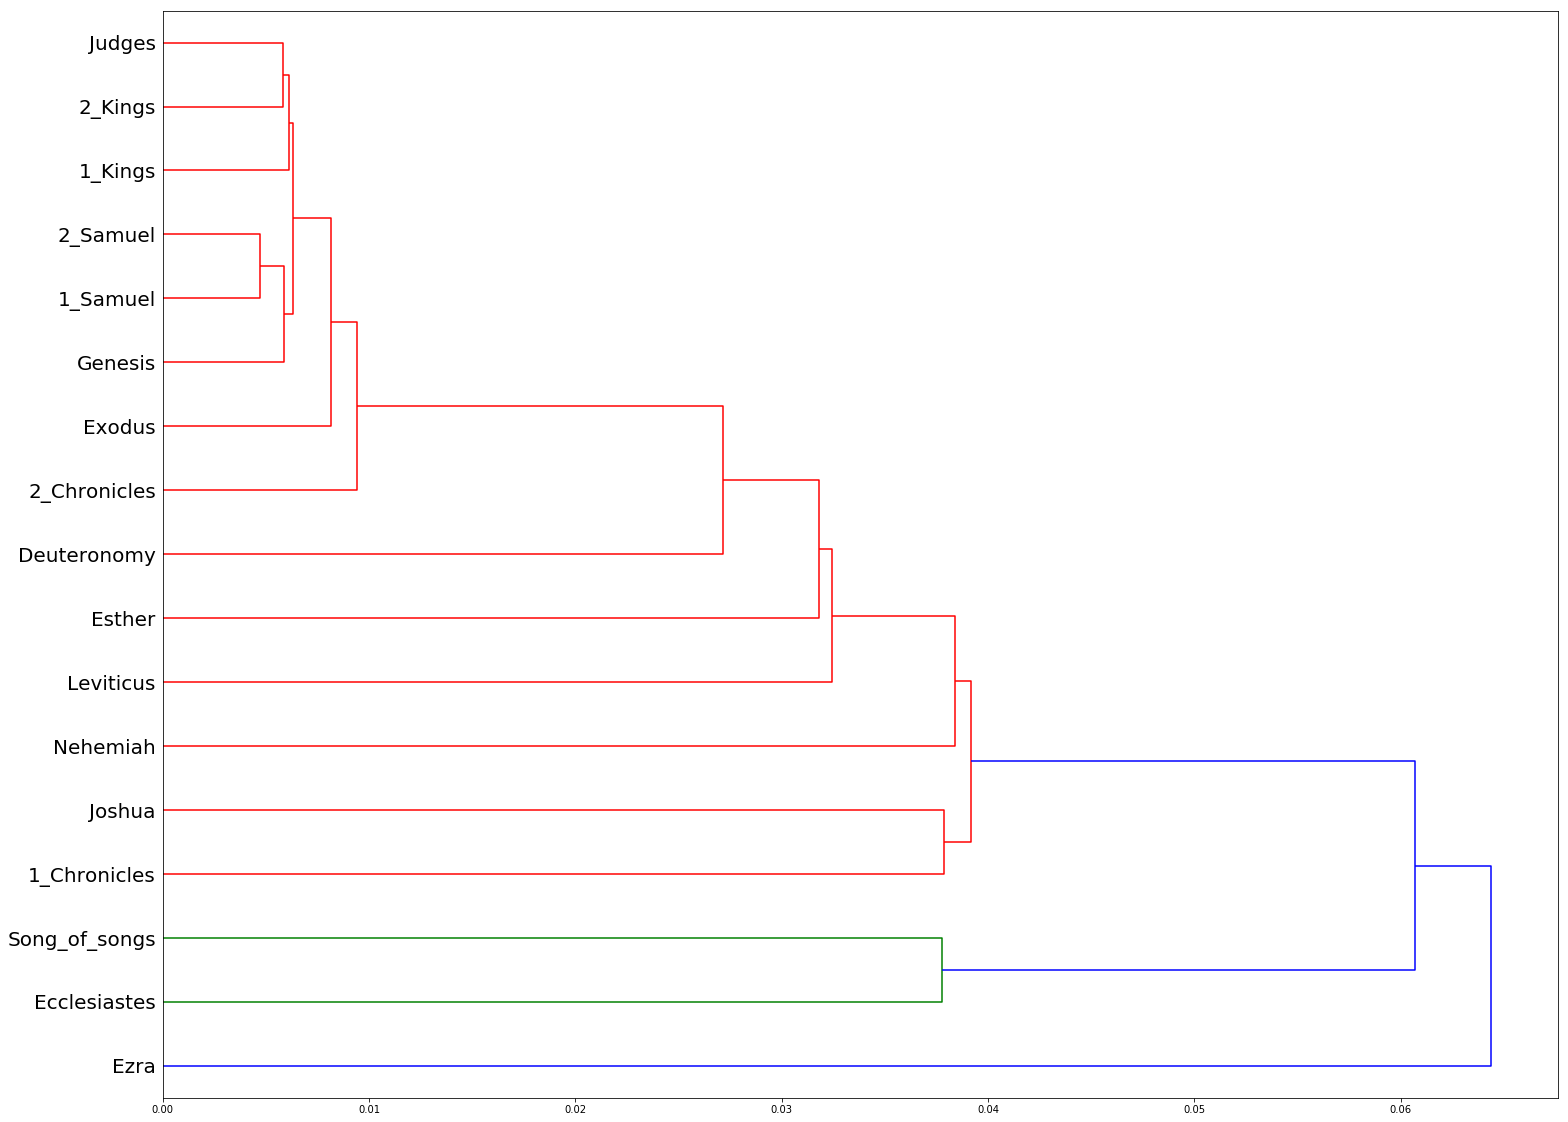

In [100]:
Z = linkageFunction(pds, "single")
dendogramPlot(Z, labels=list(df.columns))

In [63]:
list(df

,1_Chronicles,1_Kings,1_Samuel,2_Chronicles,2_Kings,2_Samuel,Deuteronomy,Ecclesiastes,Esther,Exodus,Ezra,Genesis,Joshua,Judges,Leviticus,Nehemiah,Song_of_songs
Adju->Adju,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
Adju->Clause_Begin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adju->Clause_End,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
Adju->Cmpl,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
Adju->Conj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adju->Exst,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adju->Frnt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adju->IntS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adju->Intj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adju->Loca,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
